In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.preprocessing import image 
from PIL import Image 
import numpy as np
from tensorflow.keras.models import Sequential
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors

In [2]:
with open('features.pkl','rb') as file:
    feature_list = pickle.load(file)

In [3]:

model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False 
model = Sequential([model, GlobalMaxPool2D()])

In [4]:
img = "sample.jpg"
image = load_img(img, target_size=(224, 224))
image_array = img_to_array(image)
expanded_image_array = np.expand_dims(image_array, axis=0)
processed_input = preprocess_input(expanded_image_array)
extracted_feature = model.predict(processed_input).flatten()
normalized_extracted_feature = extracted_feature/norm(extracted_feature)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [5]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

distances, indices = neighbors.kneighbors([normalized_extracted_feature])

In [6]:
from datasets import load_dataset
ds = load_dataset("yotam56/hugo_dresses_ds", split="train")

d:\Python\Projects\Fashion Recommender System\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


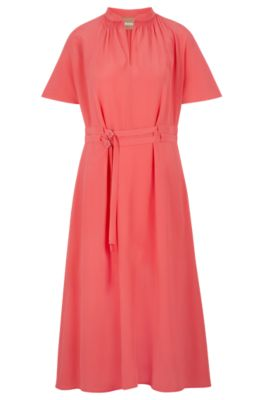

In [17]:
ds["image"][118]

In [11]:
indices

array([[119,  94,  29,  23,  99, 118]])

In [18]:
for indice in indices:
    print (indice)

[119  94  29  23  99 118]


In [19]:
for i in indice:
    print (i)

119
94
29
23
99
118


In [ ]:
list = indices.flatten().tolist()

for indice in list:
    print(ds["image"][indice])
    

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x400 at 0x1E5E9835410>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x400 at 0x1E5E8528ED0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x400 at 0x1E5E982E250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x400 at 0x1E5E8739710>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x400 at 0x1E5E86F6D90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x400 at 0x1E5E86909D0>
